<a href="https://colab.research.google.com/github/priyankaVenkateshan/Machine-learning/blob/main/CA_2_Q3%5BDesign_a_CNN_model_for_the_CIFAR_10_Dataset%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.Design a CNN model for the CIFAR-10 Dataset.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

loading the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape #10000 testing images

(10000, 32, 32, 3)

In [4]:
y_train.shape #50000 training images

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Converting 2D array into 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [35]:
classes = ["car","bike","bird","cat","deer","snake","frog","horse","ship","truck"]

Plotting the image

In [19]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,4))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

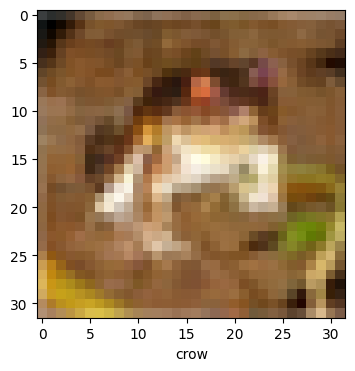

In [20]:
plot_sample(X_train, y_train, 0)

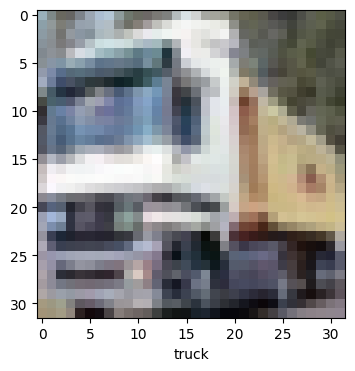

In [23]:
plot_sample(X_train, y_train, 1)

Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

Normalization

In [24]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Simple AI neural network

In [25]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 165s 105ms/step - loss: 1.8145 - accuracy: 0.3538
Epoch 2/5
1563/1563 [==============================] - 173s 110ms/step - loss: 1.6213 - accuracy: 0.4291
Epoch 3/5
1563/1563 [==============================] - 170s 109ms/step - loss: 1.5409 - accuracy: 0.4549
Epoch 4/5
1563/1563 [==============================] - 170s 109ms/step - loss: 1.4817 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 170s 109ms/step - loss: 1.4331 - accuracy: 0.4951


In [26]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 33ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.55      0.57      1000
           1       0.67      0.49      0.57      1000
           2       0.48      0.15      0.23      1000
           3       0.33      0.46      0.38      1000
           4       0.44      0.35      0.39      1000
           5       0.55      0.18      0.27      1000
           6       0.52      0.55      0.54      1000
           7       0.37      0.73      0.49      1000
           8       0.68      0.55      0.61      1000
           9       0.43      0.73      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



Convolution neural network

In [27]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [28]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.4620 - accuracy: 0.4725
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1123 - accuracy: 0.6093
Epoch 3/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.9836 - accuracy: 0.6576
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9003 - accuracy: 0.6865
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8350 - accuracy: 0.7098
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7790 - accuracy: 0.7287
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7294 - accuracy: 0.7444
Epoch 8/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.6890 - accuracy: 0.7605
Epoch 9/10
1563/1563 [==============================] - 102s 66ms/step - loss: 0.6471 - accuracy: 0.7718
Epoch 10/10
1563/1563 [==============================] - 72s 46

In [30]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.9504 - accuracy: 0.7011


[0.9504033327102661, 0.7010999917984009]

In [31]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 16ms/step


In [32]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

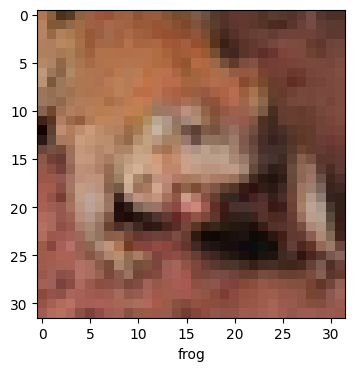

In [36]:
plot_sample(X_test, y_test,5)

In [37]:
classes[y_classes[5]]

'frog'